In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
# You can have a dataset go through multiple Models {Each model have different hyper-parameters but can be the same model}
# After using mutiple models with GridSearch we can compare against our ORIGINAL y-label Using a METRIC

In [64]:
df = pd.read_csv("Excels\\creditcard.csv")[:80000]  # did [:80000] so i can use only a portion of it (Slicing)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,58284.0,1.216664,0.249684,0.174210,0.510376,-0.179497,-0.560982,-0.021601,-0.028357,-0.179274,...,-0.253330,-0.797699,0.069440,-0.041220,0.220108,0.096814,-0.030399,0.018715,11.99,0
79996,58284.0,-0.690760,1.331928,0.913395,0.111679,-0.344744,-1.041187,0.340727,0.379708,-0.492570,...,-0.223222,-0.739941,0.060943,0.319461,-0.150171,0.075715,0.115052,0.034766,9.99,0
79997,58285.0,-2.287270,1.121568,1.163585,0.948471,-1.490482,1.046850,-0.699580,1.584645,-0.717062,...,0.243795,0.398433,-0.048050,-0.282601,0.233288,-0.252045,-0.409044,-0.253114,102.08,0
79998,58286.0,-1.350941,0.233411,0.950824,1.023505,0.415847,-0.505863,0.711381,-0.070386,-0.193938,...,0.026327,0.595887,0.461400,0.066594,-0.158632,-0.273392,0.350422,0.140851,67.50,0


In [5]:
# We are trying to predict Class column
# Our Features to predict Class (y) is from V1 to V28 (X)

In [6]:
X = df.drop(columns=['Time','Amount','Class']).values
y = df['Class'].values
f"Shapes of X = {X.shape} y={y.shape}, # Fraud Cases = {y.sum()}"
# 200 fraud cases in 80000 is pretty inbalanced

'Shapes of X = (80000, 28) y=(80000,), # Fraud Cases = 196'

In [7]:
# Model
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight = {0: 1, 1:2} ,max_iter=1000) 
# to avoid error of total no. of iterations reached limit 
# class 0 "non fraud" have a weight of 1 |||| class 1 'fraud' have a weight of 2 ( we do this to get more fraud classes selected)
mod.fit(X,y).predict(X).sum()

151

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid = {'class_weight': [{0: 1 ,1:v} for v in range(1,4)]},
    cv=4,
    n_jobs = -1
)

grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [11]:
pd.DataFrame(grid.cv_results_) # the scores that u see here is from a metric that is already in the LogisticRegression Model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.439064,0.302682,0.007501,0.001663,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,1.416176,0.381784,0.006512,0.001103,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,1.329191,0.022430,0.006486,0.002080,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3


In [13]:
lr = LogisticRegression()
??lr.score

In [16]:
from sklearn.metrics import precision_score,recall_score

precision_score(y,grid.predict(X)) # (values it should predict, predicted Values)
# precision score says : Given that i predict fraud how accurate am i ?
# this is like saying false positive 

0.7682119205298014

In [17]:
recall_score(y,grid.predict(X)) # recall says : did i get all the fraud cases? 
# this is like saying false negative

0.5918367346938775

In [18]:
# Precision score and recall score are in inverse relationship ( if one ↑ then other ↓) 

In [31]:
from sklearn.metrics import make_scorer # must import this to add my own scorers

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid = {'class_weight': [{0: 1,1:v} for v in range(1,4)]},
    scoring = {'precision': make_scorer(precision_score) ,'recall_score': make_scorer(recall_score)},
    refit = 'precision',  # to make the gridsearch select the best model between precision and recall , i must say this
    return_train_score=True, # good practice to see trainning_scores
    cv=4, # cross-validation
    n_jobs=-1  # runs the cv and grid search in parallel using multiple processors. n_jobs=-1 will use all available processors.
 
    )
grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [32]:
pd.DataFrame(grid.cv_results_) # this includes precision test and recall test scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.378815,0.281116,0.036901,0.006424,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.0,0.952381,0.857143,...,0.122449,0.545918,0.331397,3,0.863946,0.585034,0.530612,0.693878,0.668367,0.127301
1,1.447380,0.536007,0.054604,0.032443,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.0,0.955556,0.812500,...,0.265306,0.602041,0.297672,2,0.870748,0.659864,0.632653,0.782313,0.736395,0.095889
2,1.348272,0.217967,0.029421,0.011050,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.0,0.955556,0.800000,...,0.326531,0.627551,0.281816,1,0.870748,0.714286,0.680272,0.816327,0.770408,0.076568


In [35]:
#-----More Accurate Trainning-----#

grid = GridSearchCV(
     estimator=LogisticRegression(max_iter=1000),
     param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]}, # changed also the range from 1 to 20 with 30 steps
                                                             # setting the v higher means more prio on class weight 1 'fraud'
    scoring = {'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score)},
    refit = 'precision',
    return_train_score=True,
    cv=10,     # more cv means more time-running but more accurate metrics will come out
    n_jobs=-1
)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [74]:
df = pd.DataFrame(grid.cv_results_)

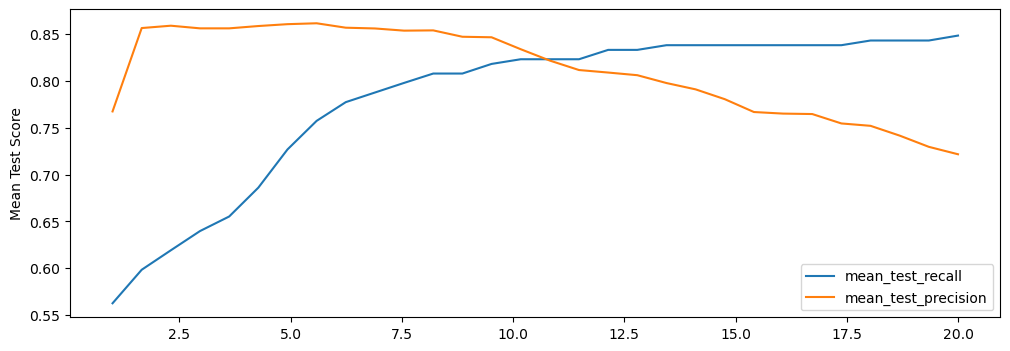

In [75]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label=score)

plt.legend()
# plt.xlabel("Class Weight for Fraud Class (1)")  # not working but x-axis for weight
plt.ylabel("Mean Test Score")
plt.show()

# Graphs for recall and precision MEAN-TESTING-scoring

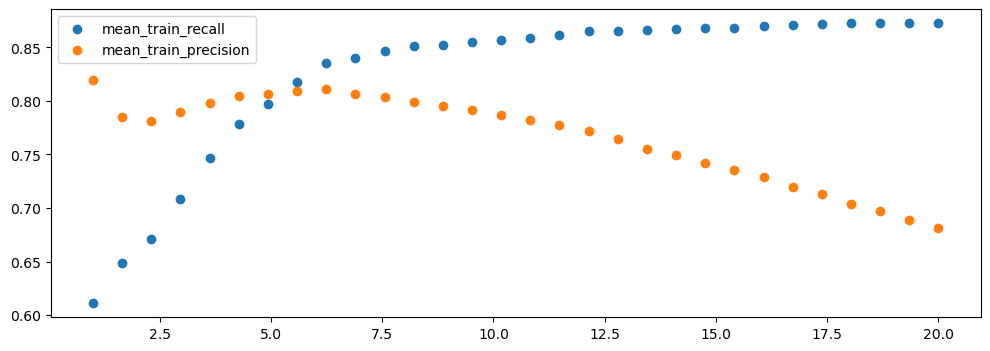

In [76]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall','mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df['param_class_weight']],
               y=df[score.replace('test','train')],
               label=score)
plt.legend()

# Graphs for recall and precision MEAN-TRAINNING-scoring

In [52]:
#-------------Making my Own Metric------------#

In [54]:
def min_recall_precision(y_true,y_pred):
    recall = recall_score(y_true,y_pred) # calcalute the recall score
    precision = precision_score(y_true,y_pred)
    return min(recall,precision)

# we did this so we can take the model which have a pretty good balance between the 2 

In [56]:
grid = GridSearchCV(
     estimator=LogisticRegression(max_iter=1000),
     param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]}, # changed also the range from 1 to 20 with 30 steps
                                                             # setting the v higher means more prio on class weight 1 'fraud'
    scoring = {'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score),
                'min_both': make_scorer(min_recall_precision)}, # added my own metric
    refit = 'min_both',
    return_train_score=True,
    cv=10,     # more cv means more time-running but more accurate metrics will come out
    n_jobs=-1
)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_precision),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

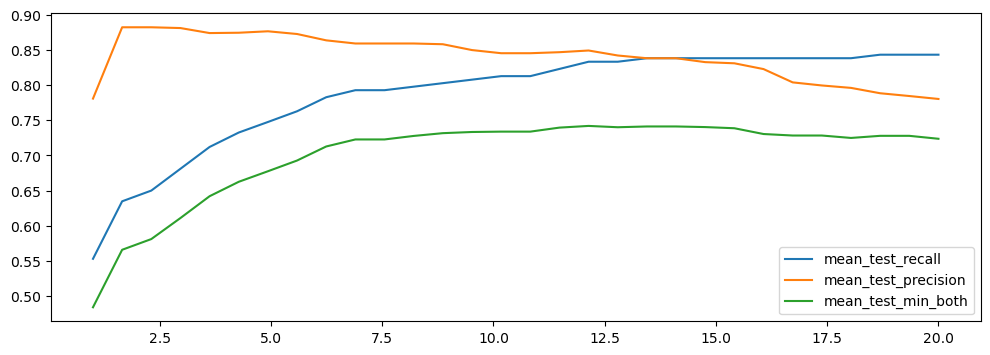

In [58]:
plt.figure(figsize=(12,4))
pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall','mean_test_precision','mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']],
                df[score],
               label=score)
plt.legend()

# Ask why min_both is lower than both

In [59]:
s = make_scorer(min_recall_precision)
??s # takes the metric and puts it in another function where it can be a callable object for the GridSearch

In [60]:
def min_recall_precision(estimator,X,y_true,sample_weight=None): # rewrote the parameters like the ones in make_scorer
    y_pred = est.predict(X) # now that we added this we don't need make_scorer
    recall = recall_score(y_true,y_pred) # calcalute the recall score
    precision = precision_score(y_true,y_pred)
    return min(recall,precision)
# like this 
#scoring = {'precision': make_scorer(precision_score),
#               'recall': make_scorer(recall_score),
#                'min_both': min_recall_precision},

# sample_weight is like class_weight (the diff is sample_weight gives prio to a whole row as class gives prio for a class)

In [65]:
def min_recall_precision(estimator,X,y_true,sample_weight=None): # rewrote the parameters like the ones in make_scorer
    y_pred = est.predict(X) # now that we added this we don't need make_scorer
    recall = recall_score(y_true,y_pred) # calcalute the recall score
    precision = precision_score(y_true,y_pred)
    return min(recall,precision)

grid = GridSearchCV(
     estimator=LogisticRegression(max_iter=1000),
     param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]}, # changed also the range from 1 to 20 with 30 steps
                                                             # setting the v higher means more prio on class weight 1 'fraud'
    scoring = {'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score),
                'min_both': make_scorer(min_recall_precision)}, # added my own metric
    refit = 'min_both',
    return_train_score=True,
    cv=10,     # more cv means more time-running but more accurate metrics will come out
    n_jobs=-1
)
grid.fit(X,y,sample_weight=np.log(1+ df['Amount'])) # added log to avoid overfitting
                                                    # compare it with original 3 line plot before with next one
                                                  # if transaction amount is like 1,000,000 and fraud then it should have prio 

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_precision),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

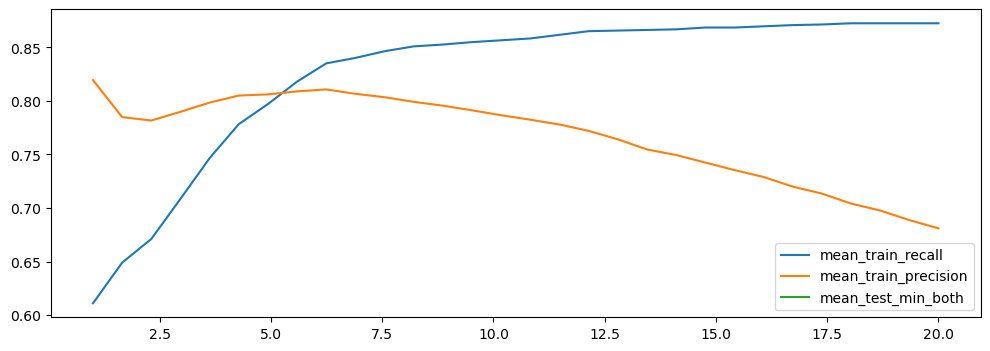

In [69]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
                df_results[score], 
                label=score)
plt.legend();


In [ ]:
#------Acting like Fruad is an outlier------#

In [79]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X) # outlier detection models doesn't need a label (y) only a dataset (X)
Counter(mod.predict(X)) # here 1 means not an outlier and -1 is an outlier

Counter({1: 76959, -1: 3041})

In [80]:
np.where(mod.predict(X) == -1,1,0) # if prediction is equal to -1 then have a 1 , otherwise 0 

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
# Scoring parameter in grid search , expects a 0/1 , not -1/1 so we need to adjust the metrics before adding it in the GridSearch

def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
     estimator=IsolationForest(),
     param_grid={'contamination':np.linspace(0.001,0.02,10)},
    scoring = {'precision': outlier_precision,
               'recall': outlier_recall}, # added my own metric
    refit = 'precision',
    cv=5,     
    n_jobs=-1
)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x0000016BBD7C0CC0>,
                      'recall': <function outlier_recall at 0x0000016BBD7C0B80>})

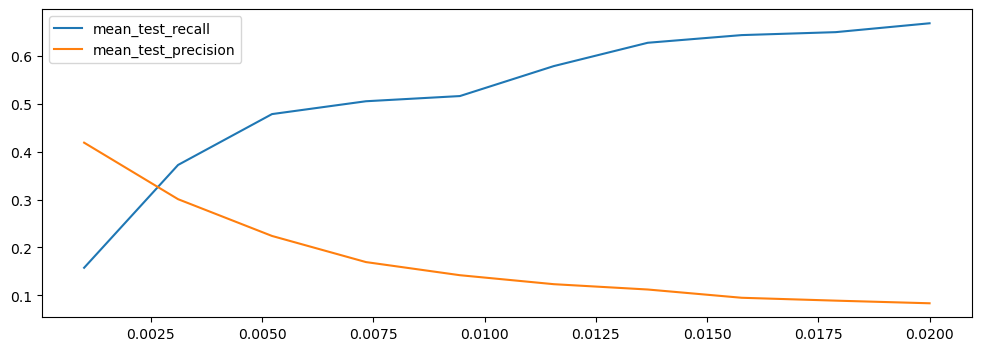

In [85]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'], 
                df_results[score], 
                label=score)
plt.legend();